## Object oriented profile design for use in personal financial forecasting simulation tool

In [6]:
import datetime
from dateutil.relativedelta import relativedelta
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Income():
    """
    Model for income (earned, passive, portfolio).
    """
    
    def __init__(self, incomeEarned):
        # Everything is on a monthly basis in the model...
        self.incomeEarned = incomeEarned

In [8]:
class Simulation():
    """
    Simulation class. Used for simulation functions and data capture.
    """
    
    def __init__(self):
        self.dateHistory = []
    

In [91]:
class Loan():
    """
    Model for user profile loans.
    """
    
    def __init__(self, loanID, principal, interestRate, annualPayments, duration, startDate):
        self.principal = principal
        self.interestRate = interestRate
        self.annualPayments = annualPayments
        self.duration = duration
        self.startDate = datetime.datetime.strptime(startDate, '%d-%m-%Y').date()
        self.loanID = loanID
        self.period = 1
        self.endDate = (self.startDate + relativedelta(years=self.duration))
        self.beginBalance = self.principal
        self.endBalance = self.principal
        self.loanPaidOff = False
        self.loanPaidOffDate = 'Not paid off - Active'
        
        # First loan payment amount
        self.loanPayment = -round(np.pmt(self.interestRate/self.annualPayments, self.duration*self.annualPayments, self.principal), 2)      
    
        # For data capture
        self.dateHistory = []
        self.loanHistory = []
    
    def initDesc(self):
        return f'''Loan {self.loanID} has principal of ${self.principal} over duration {self.duration} years with expected finish date of {self.endDate} - remaining balance: {self.endBalance}'''
    
    # Main Functions
    def makePayment(self):
        """
        Make a payment against the principal.
        """
        self.interest = round(((self.interestRate/self.annualPayments) * self.beginBalance), 2)
        self.loanPayment = min(self.loanPayment, self.beginBalance + self.interest)
        self.endBalance = self.beginBalance - (self.loanPayment - self.interest)
        self.period += 1
        self.beginBalance = self.endBalance
    
    def paymentSummary(self):
        try:
            print(f'Period: {self.period} BeginBalance: {self.beginBalance:0.2f} Principal: {self.principal:0.2f} Interest: {self.interest:0.2f} Payment: {self.loanPayment:0.2f}')
        except:
            print('Not enough information. Loan has likely not become active.')

    def loanFinished(self, date):
        """
        Used when a loan is finished.
        """
        #TODO: Add date for when loan finishes... as this may not be constant...
        self.loanPaidOff = True
        self.loanPaidOffDate = date
    
    # Misc Functions
    def increasePrincipal(self, increaseAmt):
        """
        Increase the amount of loan principal via month begin balance.
        """
        self.beginBalance += increaseAmt
        
    def increasePrincipalRandomly(self):
        """
        Increase principal by a random amount to simulate expense tranfers. TODO: integrate in the future.
        """
        if (0.99 < np.random.uniform(0,1)):
            if self.loanPaidOff == False:
                increaseAmt = np.random.randint(0,10)*1000
                self.beginBalance += increaseAmt
                print(f'Increased {self.loanID} balance by ${increaseAmt}')       
        
    # Data Capture Functions
    def getLoanHistory(self, date, loanInfo):
        """
        Used to capture temporal data for plotting and analysis.
        """
        self.dateHistory.append(date)
        self.loanHistory.append(loanInfo)

In [92]:
class Profile():
    """
    Profile for user. Contains their general information and meta data for financial modeling.
    """
    someVariable = 1337    # access via Profile.someVariable
    
    # Initializer / Instance Attributes
    def __init__(self, name, age, retireAge):
        self.name = name
        self.age = age
        self.retireAge = retireAge
        self.hasLoan = False
        self.loanDict = {}
        self.noLoans = 0
        self.hasIncome = False
        
    # Profile
    def ageStep(self, year):
        """
        Used to age the users profile and step through time.
        """
        self.age += year
        
    def getIncome(self, incomeEarnedPA):
        """
        Allocates an income to the profile.
        """
        self.hasIncome = True
        self.income = incomeEarnedPA
    
    def summary(self):
        print(f'{self.name} is {self.age} years old and has income of ${self.income} p.a.')
    
    # Loan
    def getLoan(self, principal, interestRate, annualPayments, duration, startDate):
        """
        Allocates a loan to the profile.
        """
        self.hasLoan = True
        self.noLoans += 1
        print(f'Number of loans: {self.noLoans}')
        loanID = str(self.noLoans)
        self.loanDict[loanID] = Loan(loanID, principal, interestRate, annualPayments, duration, startDate)
        
    def removeLoan(self, loanID):
        """
        Removes a loan from the profile. TODO: update to remove once paid off.
        """
        try:
            del self.loanDict[loanID]
        except:
            print('Loan doesnt exist')
            
    def loanDesc(self):
        """
        Summary of active loans.
        """
        self.currentLoans = len(self.loanDict)
        try:
            return f'Current active loans for {self.name}: {self.currentLoans}'
        except:
            return f'{self.name} has no loan'
        
    def loanInfo(self):
        """
        Detailed description of loan dict. For debugging purposes.
        """
        for loanName, loanDetails in self.loanDict.items():
            print(f'{loanDetails.initDesc()}')

# Get basic profile information and Initiate Profile

In [93]:
def init_profile():
    myProfile = Profile('Tyler', 23, 65)
    # Has income
    myProfile.getIncome(52000)
    
    myProfile.summary()
    

    # Loan 1 - mortgage
    myProfile.getLoan(350000, 0.04, 12, 25, '1-1-2021')
    # Loan 2 - car
    myProfile.getLoan(50000, 0.12, 12, 5, '01-01-2025')
    myProfile.loanDesc()
    myProfile.loanInfo()
    
    return myProfile

In [94]:
myProfile = init_profile()

Tyler is 23 years old and has income of $52000 p.a.
Number of loans: 1
Number of loans: 2
Loan 1 has principal of $350000 over duration 25 years with expected finish date of 2046-01-01 - remaining balance: 350000
Loan 2 has principal of $50000 over duration 5 years with expected finish date of 2030-01-01 - remaining balance: 50000


In [95]:
myProfile.loanDict['1'].paymentSummary()

Not enough information. Loan has likely not become active.


## Simulate

In [96]:
simulate = Simulation()

In [97]:
simulate.dateHistory

[]

### Simulation Iterations

In [98]:
# Duration of simulation (phase 1)
dateStart = datetime.date(2020,1,1)
dateStartTemp = dateStart
# dateEnd = datetime.date(2050,1,1)

# Iterate over life with month level grainularity
while myProfile.age < myProfile.retireAge:
    # Current datetime of step
    print(f'\n {dateStartTemp}')
    
    # Pay debts
    for loanID, loanInfo in myProfile.loanDict.items():
        if myProfile.loanDict[loanID].startDate <= dateStartTemp:
            
            # Random injection of principal...
            myProfile.loanDict[loanID].increasePrincipalRandomly()

            
            # If balance remains on loans - pay it back
            if 0 < myProfile.loanDict[loanID].beginBalance:
                print(f'Making payment to {loanID}')
                myProfile.loanDict[loanID].makePayment()
                myProfile.loanDict[loanID].paymentSummary()
                
                # Capture loan history information for future use
                myProfile.loanDict[loanID].getLoanHistory(dateStartTemp, myProfile.loanDict[loanID].beginBalance)
            else:
                # No principal. Either loan hasn't begun or it's finished
                myProfile.loanDict[loanID].getLoanHistory(dateStartTemp, 0)

            # Actuate attribute when loan is paid off.
            if myProfile.loanDict[loanID].beginBalance == 0 and myProfile.loanDict[loanID].loanPaidOff == False:
                print(f'LOAN {loanID} PAID OFF!')
                # Setting finished to True
                myProfile.loanDict[loanID].loanFinished(dateStartTemp)
    
        else:
            myProfile.loanDict[loanID].getLoanHistory(dateStartTemp, 0)
            print('too early - no loan active')
            pass
    
    
    # Steps through time month-by-month
    dateStartTemp += relativedelta(months=1)
    
    # Adds year to age during simulation
    if dateStartTemp.month == 1 and (dateStartTemp.year - dateStart.year) > 0:
        #print(f'Year: {dateStartTemp.year - dateStart.year}')
        myProfile.ageStep(1)
    


 2020-01-01
too early - no loan active
too early - no loan active

 2020-02-01
too early - no loan active
too early - no loan active

 2020-03-01
too early - no loan active
too early - no loan active

 2020-04-01
too early - no loan active
too early - no loan active

 2020-05-01
too early - no loan active
too early - no loan active

 2020-06-01
too early - no loan active
too early - no loan active

 2020-07-01
too early - no loan active
too early - no loan active

 2020-08-01
too early - no loan active
too early - no loan active

 2020-09-01
too early - no loan active
too early - no loan active

 2020-10-01
too early - no loan active
too early - no loan active

 2020-11-01
too early - no loan active
too early - no loan active

 2020-12-01
too early - no loan active
too early - no loan active

 2021-01-01
Making payment to 1
Period: 2 BeginBalance: 349319.24 Principal: 350000.00 Interest: 1166.67 Payment: 1847.43
too early - no loan active

 2021-02-01
Making payment to 1
Period: 3 Beg

In [99]:
myProfile.summary()

Tyler is 65 years old and has income of $52000 p.a.


In [100]:
myProfile.loanInfo()

Loan 1 has principal of $350000 over duration 25 years with expected finish date of 2046-01-01 - remaining balance: 0.0
Loan 2 has principal of $50000 over duration 5 years with expected finish date of 2030-01-01 - remaining balance: 0.0


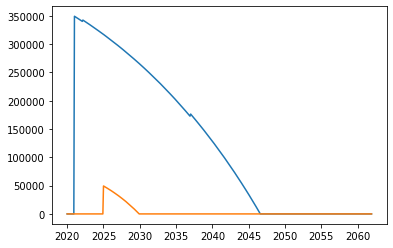

In [101]:
plt.plot(myProfile.loanDict['1'].dateHistory, myProfile.loanDict['1'].loanHistory)
plt.plot(myProfile.loanDict['2'].dateHistory, myProfile.loanDict['2'].loanHistory)

In [102]:
myProfile.loanDict['2'].loanPaidOff

True

In [103]:
myProfile.loanDict['2'].loanPaidOffDate

datetime.date(2030, 1, 1)

In [104]:
myProfile.loanDict['1'].loanPaidOffDate

datetime.date(2046, 9, 1)